In [8]:
import pandas as pd
import numpy as np
from numpy import newaxis

import random
import itertools

import os
from os import listdir
from os.path import isfile
import math

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections
from matplotlib import gridspec

import datetime
from tqdm import *
from datetime import *

import keras
from keras.applications import *
import lightgbm as lgbm
import os
from scipy import ndimage
from scipy import misc
from scipy import signal
import cv2
plt.ion()
plt.show()

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Lambda, Layer, Conv2D, MaxPooling2D,UpSampling2D, concatenate, Dropout,Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

import shutil
import collections
from collections import *

import tensorflow as tf
from IPython.display import clear_output
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from os.path import isfile, join
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from mpl_toolkits.axes_grid1 import ImageGrid

In [5]:
basedir = 'data/img/'
files = [f for f in listdir(basedir) if isfile(join(basedir, f))]
print(len(files))
files[0]

28


'ff52a3909f5801a71161cec95d213107.jpg'

In [6]:
labels = pd.read_csv('data/labels.csv')
print(labels.shape)
labels.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
le = preprocessing.LabelEncoder()
le.fit(labels.breed.unique())
print(list(le.classes_)[:10])
print(le.inverse_transform([1]))
labels['y'] = le.transform(labels.breed) 
labels.head()
y_train = to_categorical(labels['y'].values)
y_train.shape

LabelEncoder()

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle']
['afghan_hound']


,id,breed,y
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49


(10222, 120)

## revert categorical to string

In [11]:
def y_test_to_labels(y_test):
    inverted = np.apply_along_axis(np.argmax, 1, y_test)
    return le.inverse_transform(inverted)
y_test_to_labels(y_train[:2])

array(['boston_bull', 'dingo'], dtype=object)

In [14]:
img_size = 240
def normalize(arr):
    arr=arr.astype('float32')
    if arr.max() > 1.0:
        arr/=255.0
    return arr

def resizeImg(Xg):
#     cv.normalize(Xg,  Xg, 0, 1, cv.NORM_MINMAX)
#     Xg/=255.0
    Xg = normalize(Xg)
    if Xg.shape[0] >= 224:
        return cv2.resize(Xg,(img_size,img_size), cv2.INTER_AREA)
    else:
        return cv2.resize(Xg,(img_size,img_size), cv2.INTER_CUBIC)

    
def readAndResize(filename):
    dog = misc.imread(basedir + filename)
    return resizeImg(dog)

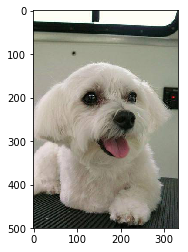

(500, 333, 3)


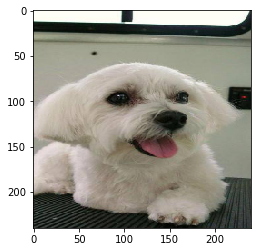

In [15]:
random_id= random.randint(0, len(files))
dog = misc.imread(basedir + files[random_id])
plt.imshow(dog)
plt.show()
print(dog.shape)

plt.imshow(resizeImg(dog))
plt.show()

In [16]:
def getInputImages(df_ids):
    file_ids = labels[labels.index.isin(df_ids)]['id'].values
    data = [readAndResize(i+ '.jpg') for i in  file_ids]
    data = np.stack(data)
    return data

def getOutput(df_ids):
    output = [y_train[i] for i in df_ids]
    output = np.stack(output)
    return output


In [18]:
plt.imshow(getInputImages([1, 2, 4])[0])

FileNotFoundError: [Errno 2] No such file or directory: 'data/img/001513dfcb2ffafc82cccf4d8bbaba97.jpg'